# 2.Ödev Diabetic Retinopathy 2015 Data Colored Resized Dataset
 2.Ödev kapsamında  Diabetic Retinopathy 2015 Data Colored Resized isimli veri kümesinin içinden Severe, Proliferate_DR, 
No_DR, Moderate ve Mild kategorileri için  rastgele 200’er görüntüyü python kullanarak bir klasöre kopyalayıp kendi datasetimi oluşturdum.Bu bölümde görsel
 üzerinde yapılan işlemleri adım adım inceleyeceğiz:

Kütüphaneleri yükledikten sonra, bir kanal ayırma fonksiyonu tanımladım ve ardından görsel okundu.

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Kanalları ayıran fonksiyon
def extract_channels(image, channels=['r', 'g', 'b']):
    r, g, b = cv2.split(image)  # Renk kanallarını ayır
    merged_img = np.zeros_like(image)  # Kanalları sıfırlarla başlatıyoruz
    if 'r' in channels:
        merged_img[:,:,0] = r  # Red kanalını al
    if 'g' in channels:
        merged_img[:,:,1] = g  # Green kanalını al
    if 'b' in channels:
        merged_img[:,:,2] = b  # Blue kanalını al
    return merged_img

# Görseli oku
image_path = r'C:\Users\USER\Desktop\colored_image\2877_right.png' 
img = cv2.imread(image_path)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


### 1-)Kırmızı ve Yeşil Kanallarla Yeni Görüntü Oluşturma

In [7]:
merged_img = extract_channels(img_rgb, channels=['r', 'g']) 

### 2-)CLAHE ile Kontrast Artırma

In [11]:
gray = cv2.cvtColor(merged_img, cv2.COLOR_RGB2GRAY)  # Gri tonlama
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))  # CLAHE
enhanced_img = clahe.apply(gray)

### 3-)Keskinleştirme (Sharpness)

In [14]:
sharp_kernel = np.array([[-1, -1, -1], 
                         [-1,  9, -1], 
                         [-1, -1, -1]])
sharp_img = cv2.filter2D(merged_img, -1, sharp_kernel)

### 4-)Gaussian Blur ile Arka Planı Bulanıklaştırma

In [17]:
blurred_background = cv2.GaussianBlur(merged_img, (15, 15), 0)

### 5-) Canny Kenar Algılama

In [20]:
blurred = cv2.GaussianBlur(enhanced_img, (5, 5), 0)  # Gürültü azaltma
edges = cv2.Canny(blurred, 50, 150)

### 6-)Dilatasyon ile Kenarları Kalınlaştırma

In [23]:
kernel = np.ones((3, 3), np.uint8)  # 3x3 boyutunda bir kernel
dilated_edges = cv2.dilate(edges, kernel, iterations=1)  # Kenarları kalınlaştırma

### 7-)Bitwise İşlemi ile Görüntü Birleştirme

In [26]:
final_image = cv2.addWeighted(sharp_img, 0.7, blurred_background, 0.3, 0)

### 8-)Canny Kenarlarını Kırmızıya Boyama

In [29]:
edges_colored = np.zeros_like(img_rgb)
edges_colored[:,:,0] = dilated_edges  # Red kanalını kenarlarla dolduruyoruz (kırmızı)
edges_colored[:,:,1] = 0      # Green kanalını 0 yapıyoruz
edges_colored[:,:,2] = 0      # Blue kanalını 0 yapıyoruz


### 9-)Final Görüntüsünü Oluşturma

In [32]:
final_with_edges = cv2.addWeighted(final_image, 0.7, edges_colored, 0.3, 0)

### 10-)Orijinal Görüntü ile Final Görüntüsünü Birleştirme

In [35]:
final_merged_image = cv2.addWeighted(img_rgb, 0.5, final_with_edges, 0.5, 0)

### 11-)Keskinleştirilmiş Görüntü ile Final 1'i Birleştirme

In [38]:
final2_image = cv2.addWeighted(final_merged_image, 0.7, sharp_img, 0.3, 0)

### 12-)Özgün Fonksiyon - Parlaklık ve Doygunluk Artırma

In [41]:
def enhance_saturation_brightness(image, saturation_scale=1.3, brightness_scale=1.2):
    """
    HSV renk uzayında doygunluk ve parlaklık artırma.
    
    :param image: Girdi RGB görüntüsü
    :param saturation_scale: Doygunluk için çarpan
    :param brightness_scale: Parlaklık için çarpan
    :return: Parlaklık ve doygunluğu artırılmış RGB görüntüsü
    """
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)  # RGB'den HSV'ye dönüştür
    h, s, v = cv2.split(hsv_image)  # HSV kanallarını ayır

    # Doygunluğu ve parlaklığı artır
    s = cv2.multiply(s, saturation_scale)  # Doygunluk artırma
    v = cv2.multiply(v, brightness_scale)  # Parlaklık artırma

    # Kanalları birleştir
    hsv_image = cv2.merge([h, s, v])

    # RGB'ye geri dönüştür
    enhanced_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)
    return enhanced_image

# Parlaklık ve doygunluk artırma
enhanced_img_with_saturation = enhance_saturation_brightness(final2_image)


### 13-)Görselleştirme

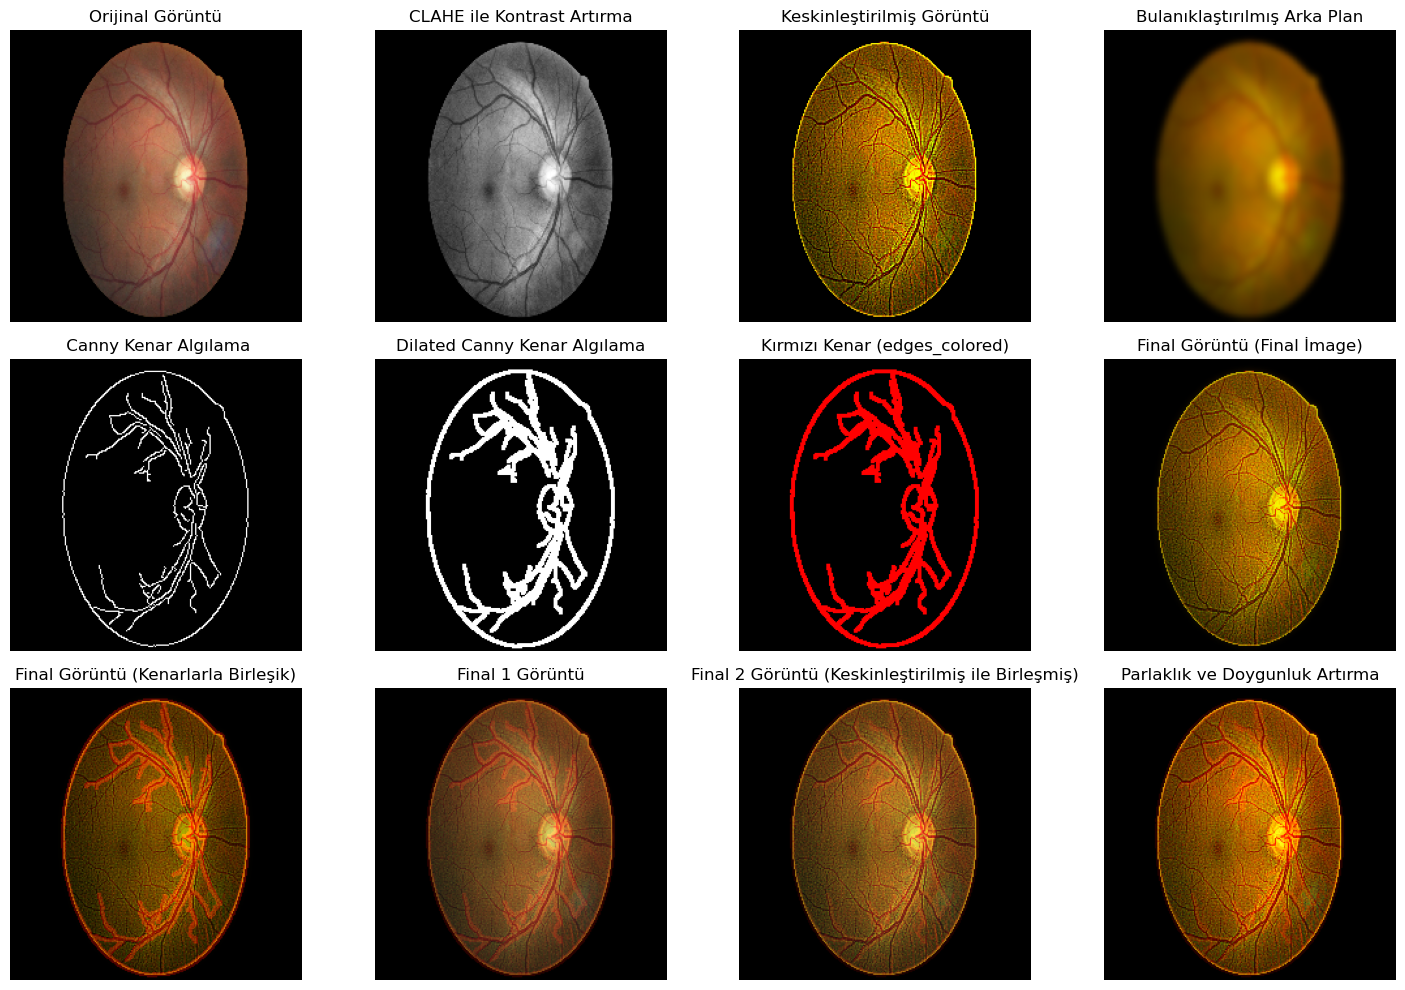

In [44]:
plt.figure(figsize=(15, 10))

# 1. Orijinal Görüntü
plt.subplot(3, 4, 1)
plt.imshow(img_rgb)
plt.title("Orijinal Görüntü")
plt.axis('off')

# 2. Kontrastı Artırılmış Görüntü (CLAHE)
plt.subplot(3, 4, 2)
plt.imshow(enhanced_img, cmap='gray')
plt.title("CLAHE ile Kontrast Artırma")
plt.axis('off')

# 3. Keskinleştirilmiş Görüntü
plt.subplot(3, 4, 3)
plt.imshow(sharp_img)
plt.title("Keskinleştirilmiş Görüntü")
plt.axis('off')

# 4. Arka Planı Bulanıklaştırılmış Görüntü
plt.subplot(3, 4, 4)
plt.imshow(blurred_background)
plt.title("Bulanıklaştırılmış Arka Plan")
plt.axis('off')

#5.5 Canny 
plt.subplot(3, 4, 5)
plt.imshow(edges, cmap='gray')
plt.title(" Canny Kenar Algılama")
plt.axis('off')

# 5. Kenar Algılama Sonucu (Canny)
plt.subplot(3, 4, 6)
plt.imshow(dilated_edges, cmap='gray')
plt.title("Dilated Canny Kenar Algılama")
plt.axis('off')

# 6. Final Görüntü (Kırmızı kenar)
plt.subplot(3, 4, 7)
plt.imshow(edges_colored)
plt.title("Kırmızı Kenar (edges_colored)")
plt.axis('off')

# 6. Final Görüntü (Kırmızı kenar olmadan önce)
plt.subplot(3, 4, 8)
plt.imshow(final_image)
plt.title("Final Görüntü (Final İmage)")
plt.axis('off')


# 6. Final Görüntü (Orijinal ve Kenarlarla Birleşmiş)
plt.subplot(3, 4, 9)
plt.imshow(final_with_edges)
plt.title("Final Görüntü (Kenarlarla Birleşik)")
plt.axis('off')

# 7. Orijinal ve Final Görüntüsünün Birleşmiş Hali (Final 1)
plt.subplot(3, 4, 10)
plt.imshow(final_merged_image)
plt.title("Final 1 Görüntü")
plt.axis('off')

# 8. Keskinleştirilmiş ile Final 1'i Birleştirme (Final 2)
plt.subplot(3, 4, 11)
plt.imshow(final2_image)
plt.title("Final 2 Görüntü (Keskinleştirilmiş ile Birleşmiş)")
plt.axis('off')

# 9. Parlaklık ve Doygunluk Artırılmış Final Görüntüsü
plt.subplot(3, 4, 12)
plt.imshow(enhanced_img_with_saturation)
plt.title("Parlaklık ve Doygunluk Artırma")
plt.axis('off')

plt.tight_layout()
plt.show()

## Oluşturulan Akışı Tüm Datasete Uygulama 

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# --- Kanal Ayırma Fonksiyonu ---
def extract_channels(image, channels=['r', 'g', 'b']):
    r, g, b = cv2.split(image)
    merged_img = np.zeros_like(image)
    if 'r' in channels:
        merged_img[:, :, 0] = r
    if 'g' in channels:
        merged_img[:, :, 1] = g
    if 'b' in channels:
        merged_img[:, :, 2] = b
    return merged_img

# --- Parlaklık ve Doygunluk Artırma Fonksiyonu ---
def enhance_saturation_brightness(image, saturation_scale=1.3, brightness_scale=1.2):
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
    h, s, v = cv2.split(hsv_image)
    s = cv2.multiply(s, saturation_scale)
    v = cv2.multiply(v, brightness_scale)
    hsv_image = cv2.merge([h, s, v])
    enhanced_image = cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB)
    return enhanced_image

# --- Görüntü İşleme Fonksiyonu ---
def process_image(img_rgb):
    merged_img = extract_channels(img_rgb, channels=['r', 'g'])

    # CLAHE ile kontrast artırma
    gray = cv2.cvtColor(merged_img, cv2.COLOR_RGB2GRAY)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    enhanced_img = clahe.apply(gray)

    # Keskinleştirme
    sharp_kernel = np.array([[-1, -1, -1],
                             [-1,  9, -1],
                             [-1, -1, -1]])
    sharp_img = cv2.filter2D(merged_img, -1, sharp_kernel)

    # Bulanıklaştırılmış Arka Plan
    blurred_background = cv2.GaussianBlur(merged_img, (15, 15), 0)

    # Kenar Algılama ve Dilatasyon
    blurred = cv2.GaussianBlur(enhanced_img, (5, 5), 0)
    edges = cv2.Canny(blurred, 50, 150)
    kernel = np.ones((3, 3), np.uint8)
    dilated_edges = cv2.dilate(edges, kernel, iterations=1)

    # Bitwise ile birleştirme
    final_image = cv2.addWeighted(sharp_img, 0.7, blurred_background, 0.3, 0)

    # Kenarları kırmızı boyama
    edges_colored = np.zeros_like(img_rgb)
    edges_colored[:, :, 0] = dilated_edges  

    # Final görüntüsü oluşturma
    final_with_edges = cv2.addWeighted(final_image, 0.7, edges_colored, 0.3, 0)
    final_merged_image = cv2.addWeighted(img_rgb, 0.5, final_with_edges, 0.5, 0)
    final2_image = cv2.addWeighted(final_merged_image, 0.7, sharp_img, 0.3, 0)

    # Parlaklık ve doygunluk artırma
    enhanced_img_with_saturation = enhance_saturation_brightness(final2_image)

    return enhanced_img_with_saturation

# --- Toplu İşlem ve Kaydetme ---
input_root = r'C:\Users\USER\Desktop\colored_dataset'
output_root = r'C:\Users\USER\Desktop\processed_dataset'


for category in os.listdir(input_root):
    input_category_path = os.path.join(input_root, category)
    output_category_path = os.path.join(output_root, category)

    if not os.path.exists(output_category_path):
        os.makedirs(output_category_path) 

    for filename in os.listdir(input_category_path):
        if filename.endswith('.png') or filename.endswith('.jpg') or filename.endswith('.jpeg'):
            img_path = os.path.join(input_category_path, filename)
            img = cv2.imread(img_path)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

            processed_img = process_image(img_rgb)

            processed_img_bgr = cv2.cvtColor(processed_img, cv2.COLOR_RGB2BGR)

            output_path = os.path.join(output_category_path, filename)
            cv2.imwrite(output_path, processed_img_bgr)

print("Tüm resimler başarıyla işlendi ve kaydedildi!")


Tüm resimler başarıyla işlendi ve kaydedildi!
